# Tianna Richardson Lab 2: Statistics

## Abstract

In this lab we aimed to write a function to calculate the binomial probability of a coin toss with x amount of coins N amount of times. The first function that we wrote calculates the probability of the coin toss assuming equal probabilites of heads and tails. The second function that we wrote calculates the probability assuming a user defined proability of heads or tails. We are doing this to numerically solve for the binomial approximation because while the approximation is convienent analytically, it is not as convienent when it it necessary to have accurate results. In order to do this, we first defined a for loop, and then functions that performed the desired operations. From there we were able to plot and manipulate different things about the functions to get the numerical results that we desired.

## Introduction

   In this experiment, we assume frequentist probability theory. This is a probability theory that defines an event's probability as the limit of it's relative frequency in a large number of trials, per the exact definition. It is the idea that the probability of an event can be generally defined by the total number of desired outcome divided by the total number of trials. As more trials are conducted, the approximation becomes increasingly accurate. 
   The binomial distribution finds itself within frequentist probability. The binomial distribution is a discrete probability distribution of the number of successes in a sequence of independent experiements. This distribution is most frequently used to desbribe the number of desired outcomes n out of a larger number of trials, N. The set backs of this distribution is that the outcomes are limited to "yes or no", meaning there have to be definite outcomes. This limits this distribution being useful in every situation. However, it is useful to us here since we are testing the probabilities of a coin toss, which has distinct outcomes of yes or no, 1 or 0. In order for this approximation to be accurate, N must be much larger than n, which is also true of our case. 
   
   What I plan to accomplish in this experiment is to write a function that can numerically calculate the binomial distribution of heads in a coin toss with a user defined number of coins and trials. From this I will further analyze the data, and write functions for the Poisson distribution as well. Then I will compare these two distributions with the functions that I write, and see the results.

## Theory

There are a couple important equations that are relevant in this experiment. First is the binomial probability distribution mentioned above in the Introduction. The bionomial probability distribution is defined as
$$P\left(N,x\right)=\frac{N!}{x!\left(N-x\right)!}p^x\left(1-p\right)^\left(N-x\right)$$
The first term in the binomial distribution is called the binomial coeffcient. It describes the probability that any number of x successes can occur within a number of N trials. What this coeffcient does is distribute the successes over the trials. x successes occure with p^x, and failures occur with probability (1-p)^(1-k). This is because it is subtracting the number of successes, before calculating the probability of a failure.

It is possible to derive the Poisson Equation from the Binomial distribution assuming a very small p, which is the probability of a positive outcome. First, we are given that \lambda=Np. From that: p=frac{\lambda}{n}
$$\lim_{n\to\infty} \frac{n!}{x!(n-x)!}(\frac{\lambda}{n})^x(1-\frac{\lambda}{n})^(n-x)$$
Using this, but taking out the constants,
$$(\frac{\lambda^x}{x!})\lim_{n\to\infty}(\frac{\lambda}{n})^x(1-\frac{\lambda}{n})^(n-x)$$
To take this limit, we will begin by doing the terms one at a time
$$\lim_{n\to\infty}(\frac{n(n-x)(n-x-1)...(1)}{(n-x)(n-x-1)...(1)})(\frac{1}{n^x})$$
$$\lim_{n\to\infty}(\frac{n}{n})(\frac{n-1}{n})(\frac{n-2}{n})...(\frac{n-x+1}{n})$$
This limit goes to 1, so effectively this term goes to 1 and disappears from our limit.
The second term of the limit is:
$$\lim_{n\to\infty}(1-(\frac{\lambda}{n}))^n$$
This is very similar to the definition of e. If we define a random value y to be -frac{n}{lambda} and substitute it into our limit, then we get
$$\lim_{n\to\infty}(1+(\frac{1}{y}))^(y(-\lambda))$$
and this simplifies to 
$$e^(-\lambda)$$
So that term simplifies to that. The last term is
$$\lim_{n\to\infty}(1-(\frac{\lambda}{n}))^(-x)$$
As n approaches infinity in the limit, the term becomes $1^(-x)$, which ends up being equal to 1. So the entire limit can be rewritten as follows:
$$(frac{\lambda^x}{x!})(1)(e^(\lambda))(1)$$
This then gives:
$$P(\lambda,x)=((\frac{\lambda^(x))e^(-\lambda))}{x!}$$
This gives us the exact formula for the Poisson Equation.

Poisson's distribution as described above is another discrete probability distribution. A Poisson distribution describes events taking place at a constant rate in time or space, so it is different from the binomial distribution.It can be useful in describing the number of events over a given time span or area. The outcome of one event does not influence the probability of the next event, though. 

Another equation used in this experiment is the formula for the expectation value. The expectation value is defined as:
$$E(x) = xP(x)$$ all summed together. For example, with tossing a coin 10 times, the expectation value would be 5 because the epxected number of heads would be half of 10, which is 5. For other situations like this, where the outcome of each event is equally probable, then the expected value just ends up being the average. If they weren't equally probable, then the p values for each of the terms would change.

An equation for variance is also relevant to this experiment. The Variance in this experiment is defined in the lab manual as:
$$Var(x)= <(x-<x>)^2>$$
The variance is a parameter describing the expected value of the standard deviation squared from the mean of the distribution. What this tells you is how much values in a data set are distributed relative to the data set's mean. The Variance is especially important in describing the quality of a fit. The Variance can be manipulated to
$$Var(x)= <x^2>-<x>$$
So,
$$Var(x)= <(x^2-2X<x>+<x>^2)>$$
$$Var(x)= <x^2>-2<x><x>+<<x^2>>$$
$$Var(x)= <x^2>-2<x>^2+<x>$$
$$Var(x)= <x^2>-<x>^2$$







## Experiment and Methodology

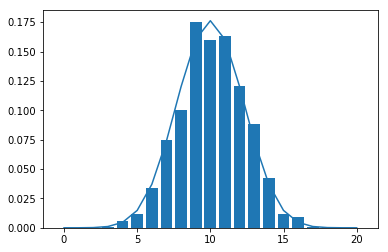

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML

N = 20 #number of coins
M = 1000 #number of trials
counts = np.zeros(N+1)
for i in range(0,M):
        draw = np.random.randint(2, size=N) #this line draws either a 1 or a 0
        heads_count = len(draw[(np.where(draw == 1))]) #if 1, heads
        tails_count = len(draw[(np.where(draw == 0))]) #if 0, tails
        counts[heads_count] = counts[heads_count] + 1

from scipy.misc import factorial
def PNx(N):
    p = 0.5 #probability of getting heads vs tails is 0.5
    x = (np.arange(N+1))
    PNx = factorial(N)/((factorial(x)*factorial(N-x)))*((0.5)**N) #given binomial distribtion, described in theory
    return PNx

plt.bar(np.arange(N+1), counts/M)
plt.plot(np.arange(N+1), PNx(N))
plt.show()

In [2]:
#Expectation Value
#defined as E(x) = Sum N=0, i=0 of x*P(x) M
M=1000 #number of trials
N=20 #number of coins
Ex = np.sum(np.arange(N+1)*PNx(N))

Exp = np.sum(np.arange(N+1.)*(counts/M))
print(Ex) #this is the expected expected value
print(Exp) #this is the actual value

10.0
10.127


[ 0.115  0.261  0.282  0.204  0.087  0.037  0.011  0.003  0.     0.     0.
  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.   ]


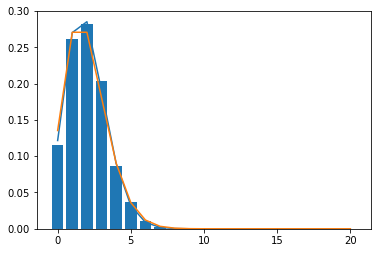

In [90]:
#2b
p = 0.1 #probability of getting heads
M = 1000 #flips
N = 20 #coins
counts = np.zeros(N+1)
for i in range (0,M):
    draw = np.random.uniform(0,1, size=N)
    heads_count = len(draw[np.where(draw < p)]) #Got heads (rare)
    tails_count = len(draw[(np.where(draw > p))]) #Got tails (most of the time)
    counts[heads_count] = counts[heads_count] + 1
print(counts/M)

def PNx(N):
    p = 0.1 #user defines the probability
    x = (np.arange(N+1))
    PNx = factorial(N)/((factorial(x)*factorial(N-x)))*((p)**x)*(1-p)**(N-x) #probability distribution given
    return PNx
def PNs(N) : #Poissons Distribution 
    e = 2.7182818
    p = 0.1
    x = (np.arange(N+1))
    l = N*p
    PNs = ((l**x)*e**(-l))/factorial(x)
    return PNs

plt.bar(np.arange(N+1), counts/M)
plt.plot(np.arange(N+1), PNx(N)) #Binomial distribution
plt.plot(np.arange(N+1), PNs(N)) #Poisson's distribution
plt.show()

In [3]:
#2d

M=1000 #number of trials
N=20 #number of coins
Ex = np.sum(np.arange(N+1)*(counts/M)) #terms of expectation value
Ex2 = np.sum(((np.arange(N+1))**2)*(counts/M)) #terms of expectation value
print(Ex2)

Var1 = Ex2 - (Ex)**2
print(Var1) 

def F(Ex):
    Ex = (np.arange(N+1))
    for Ex in range(0,N):
        Ex = np.sum(np.arange(N+1)*(counts/M))
        Ex2 = np.sum(((np.arange(N+1))**2)*(counts/M))
        #Ex = np.sum(np.arange(N+1)*(counts/M))
        Var = Ex2 - (Ex)**2
    return Var
#Wasn't able to plot

107.747
5.190871


## Summary

In this lab we explored calculating the binomial distribution numerically using code instead of approximations. To do this, first we defined a for function that calculated the probability of getting a heads with the user defined number of flips and coins. After this for loop worked successfully, we defined a function using the given function in the binomial notebook in the lab module. In this function, we were able to do the same thing as the for loop. We once again used some user defined number of trials an number of successes x and returns the observed probability. Once this function operated, we plotted this function with a bar chart. M needs to be large to sum over for an average, so we set M (the number of flips) to 1000 across the board. In order to fill the variables of the number of coins and the number of flips, we simply defined them outside of the loop and the function for any user to easy manipulate. We then plotted a histogram of our probabilities using 20 coins, increasing from 1 coin to 20 coins and the observed successes of the corresponding coin numbers. The peak of our distribution is around 10 coins, which is expected based on the known probability of flipping a coin. We then plotted the binomial probability formula as a line overlayng the histogram. We numerically calculated the analytical prediction using the same for loop that we orignially wrote in the very first cell. It turns out it is pretty reliable for this. Lastly, we calculated the expected value using the derived version mentioned in the theory section and given to us in the lab section. The code for this is fairly simple, using sums of squares. This cell also gives us two values, the first is the expected value and the second is the observed.

In the second part of the lab we used the Poisson distribution derived from the binomial distribution that was mentioned. To do this we had to define a function, which basically exactly follows the given form of the function. After plotting the Poisson's distribution in addition to the binomial distribution, we rewrote the binomial probability distribution to be able to change the probability of getting a heads to be very skewed. In order to do this, we had to change our for loop to not generate integers, but numbers between 0 and 1, and then define criteria for it to be above p or below p. The for loop functioned the same way as before past this point. This for loop gave us the observed probability of getting heads with N number of coins and M number of trials with a user defined p probability of getting heads. Then we plotted all of these functions together to see their similarities and differences. Lastly, we calculated Variance as per the derivation in the theory section above. This variance tells us how far the the number of successes are from the average number of successes, i.e. 10 for 20 coins. We were not finished in completing the corresponding plot, but since it was determined to be extra credit I decided to omit what I had tried to come up with.

## Conclusions

The results of this lab allow me to conclude that we successfully numerically calculated the binomial distribution, and that we were able to compare it to a set of other parameters to further analyze the data set of the probability of getting a number of heads with N number of coins with M number trials. In doing this, we also proved to ourselves that the binomial distribution is a good estimation for the behavior of a situation that we are aiming to describe. The expected values that we calculated were close to the expected expected value, and the Variance remained at a value that is reasonable for the distribution that we are describing. Throughout this experiment we broaded our use of functions and statistics, a functionality that will serve us as Astronomers in the years to come.